<a href="https://colab.research.google.com/github/nawidadkhah/MachineLearning_Algorithms/blob/main/Supervised/Regression/Simple%20Linear%20Regression/Salary_by_experiences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Set the drive for gettin cnf file
from google.colab import drive
drive.mount("/content/drive/")

In [2]:
# Reading the data from the path
path = '/content/drive/MyDrive/Salary_dataset.csv'
data = pd.read_csv(path)

In [54]:
# Set the initial variables
x_feature = data["YearsExperience"]
y_target = data["Salary"]
m = len(x_feature)

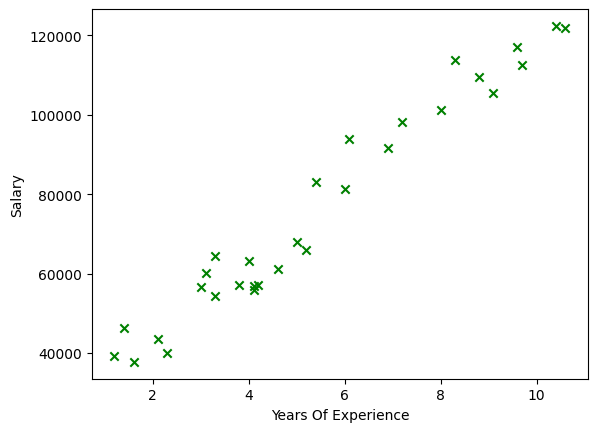

In [56]:
# Plot the training models
plt.scatter(x_feature, y_target,color='g', marker="x")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

In [66]:
# Calculating the cost function with w and b, the function: f_w,b(x) = wx + b, the J function: j(x) = 1/2m * Σ(f_w,b(x) - y[i])^2
def calculate_cost(x, y, w, b):
  j = 0
  for i in range(m):
    f_wb = (w * x[i]) + b
    j += (f_wb - y[i]) ** 2
  j = j / (2 * m)

  return j

In [67]:
# Calculating the dj_dw(j(x)) and dj_db(j(x)) for w and b
def calculate_gradient(x, y, w, b):
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = (w * x[i]) + b
    dj_dw_tmp = (f_wb - y[i]) * x[i]
    dj_db_tmp = (f_wb - y[i])
    dj_dw += dj_dw_tmp
    dj_db += dj_db_tmp
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [68]:
# Iteration until w and b are converge
def find_params(x, y, w, b, iteration, alpha, J_history, p_history):
  for i in range(iteration):
    dj_dw, dj_db = calculate_gradient(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    if i<1000000:      # prevent resource exhaustion
       J_history.append(calculate_cost(x, y, w , b))
       p_history.append([w,b])
    if i % 1000 == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b

In [69]:
# This function show the chart of j as Y axis and w as a X axis
def j_by_w():
  js= []
  ws= []
  for i in range(-20000,60000):
    js.append(calculate_cost(x_feature, y_target, i , 0))
    ws.append(i)
  plt.scatter(ws,js)
  plt.xlabel("W")
  plt.ylabel("J(x)")
  plt.show()

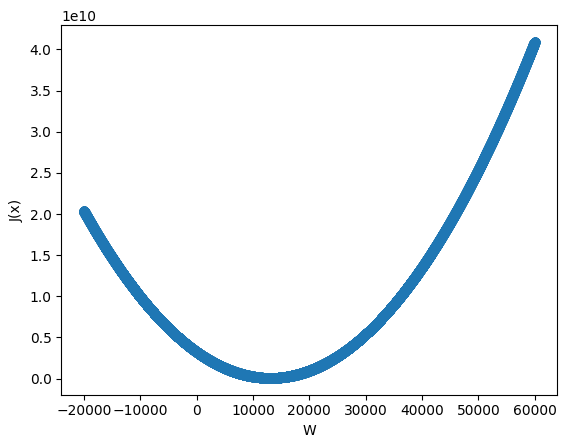

In [70]:
# Calling the funtion
j_by_w()

In [71]:
# initialize parameters
w_init = 0
b_init = 0
J_history = []
p_history = []
iterations = 10000
alpha = 0.01
w, b = find_params(x_feature, y_target, w_init, b_init, iterations, alpha, J_history, p_history)
print(f"w: {w:9.4f}\nb: {b:10.4f}")

Iteration    0: Cost 1.30e+09  dj_dw: -4.850e+05, dj_db: -7.600e+04   w:  4.850e+03, b: 7.60040e+02
Iteration 1000: Cost 1.65e+07  dj_dw:  8.854e+01, dj_db: -6.033e+02   w:  9.880e+03, b: 2.19186e+04
Iteration 2000: Cost 1.57e+07  dj_dw:  1.132e+01, dj_db: -7.711e+01   w:  9.505e+03, b: 2.44737e+04
Iteration 3000: Cost 1.56e+07  dj_dw:  1.447e+00, dj_db: -9.856e+00   w:  9.457e+03, b: 2.48003e+04
Iteration 4000: Cost 1.56e+07  dj_dw:  1.849e-01, dj_db: -1.260e+00   w:  9.451e+03, b: 2.48421e+04
Iteration 5000: Cost 1.56e+07  dj_dw:  2.363e-02, dj_db: -1.610e-01   w:  9.450e+03, b: 2.48474e+04
Iteration 6000: Cost 1.56e+07  dj_dw:  3.021e-03, dj_db: -2.058e-02   w:  9.450e+03, b: 2.48481e+04
Iteration 7000: Cost 1.56e+07  dj_dw:  3.862e-04, dj_db: -2.631e-03   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  dj_dw:  4.936e-05, dj_db: -3.363e-04   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  dj_dw:  6.309e-06, dj_db: -4.299e-05   w:  9.450e+03, b: 2.48482e+04


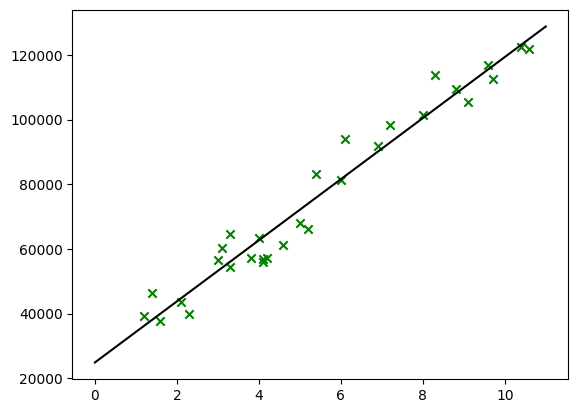

In [72]:
# Create the model function and apply it to the training data
w_final = w
b_final = b
line_x = []
line_y = []
for i in range(12):
  line_x.append(i)
  line_y.append((w_final*i)+b_final)

plt.plot(line_x, line_y,color='k')
plt.scatter(x_feature, y_target,color='g', marker="x")
plt.show()

In [75]:
# Here are some predictions shown
print(f"an employee with 13 years of experience, gets {w_final * 13 + b_final:0.1f}$ salary")
print(f"an employee with 16 years of experience, gets {w_final * 16 + b_final:0.1f}$ salary")
print(f"an employee with 1 years of experience, gets {w_final * 1 + b_final:0.1f}$ salary")
print(f"an employee with 7 years of experience, gets {w_final * 7 + b_final:0.1f}$ salary")

an employee with 13 years of experience, gets 147697.7$ salary
an employee with 16 years of experience, gets 176047.6$ salary
an employee with 1 years of experience, gets 34298.2$ salary
an employee with 7 years of experience, gets 90997.9$ salary
